In [1]:
import tensorflow as tf
import numpy as np
from random import shuffle
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Попробуем решить задачу нахождения суммы последовательности чисел с помощью реккурентной нейронной сети(LSTM)

Сформируем выборку

In [2]:
np.random.seed(1)
N = 100000
input_data = list()
y = list()
for _ in range(N):
    x = np.random.normal(0, 1, 10).reshape(10,1)
    input_data.append(x)
    y.append(sum(x))

С помощью фреймворка tensorflow определим граф вычислений

In [3]:
# Тензоры для входных данных
data = tf.placeholder(tf.float32, [None, 10, 1])
target = tf.placeholder(tf.float32, [None, 1])

In [4]:
# Скрытый слой
num_hidden = 30
cell = tf.nn.rnn_cell.LSTMCell(num_hidden, state_is_tuple=True)

val_, state = tf.nn.dynamic_rnn(cell, data, dtype=tf.float32)
                                
val = tf.transpose(val_, [1, 0, 2])
last = tf.gather(val, int(val.get_shape()[0]) - 1)

weight = tf.Variable(tf.truncated_normal([num_hidden, int(target.get_shape()[1])]))
bias = tf.Variable(tf.constant(0.1, shape=[target.get_shape()[1]]))

prediction = tf.matmul(last, weight) + bias

In [5]:
# Функция потерь
loss = tf.reduce_mean((prediction-target)**2)
                                
optimizer = tf.train.AdamOptimizer().minimize(loss)

C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:95: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [40]:
errors = []
batch_size = 10000
epochs = 30

# Обучение
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for ep in tqdm_notebook(range(epochs)):
        for i in range(N // batch_size):
            batch = input_data[i*batch_size:(i+1)*batch_size]
            y_batch = y[i*batch_size:(i+1)*batch_size]
            _, l  = sess.run([optimizer, loss], {data: batch, target: y_batch})
        errors.append(l)
    
    ex = np.arange(10,20).reshape(10,1)
    mean = ex.mean(); std = ex.std()
    ex = (ex - mean)/std**2
    rez = sess.run([prediction], {data: [ex_]})
    
    print('y',sum(ex)*std**2 + mean)
    print('predicted',rez[0][0][0]*std**2 + mean)


y [ 14.5]
predicted 14.6428069547


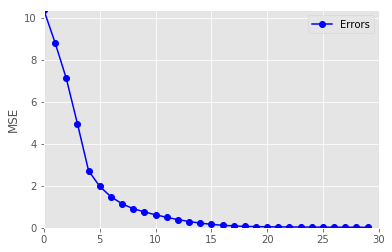

In [38]:
# Кривая обучения
plt.plot(errors, '-o', c='b', label='Errors')
plt.xlim(0, len(errors))
plt.ylim(0, max(errors))
plt.ylabel('MSE')
plt.legend()
plt.show()